<a href="https://colab.research.google.com/github/dtan6/Toxic-and-Nontoxic-Ivy-Oak-Leaf-Identifier/blob/main/PoisonIvy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import os
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
plant_path = "/content/drive/MyDrive/Poison Ivy Detection Datasets"
image_arrays = []
data_with_label = []
image_size = (224, 224)
non_toxic_folder= "/content/drive/MyDrive/Poison Ivy Detection Datasets/nontoxic_images"
for species in os.listdir(non_toxic_folder):
    species_folder_path = os.path.join(non_toxic_folder, species)
    for file in os.listdir(species_folder_path):
        image_path = os.path.join(species_folder_path, file)
        image = Image.open(image_path)
        image = image.resize(image_size)
        image = image.convert("RGB")
        image_array = np.array(image)
        image_arrays.append(image_array)
        data_with_label.append([image_array, "non_toxic"])


In [ ]:
len(data_with_label)

4972

In [ ]:

toxic_folder= "/content/drive/MyDrive/Poison Ivy Detection Datasets/toxic_images"
for species in os.listdir(toxic_folder):
    species_folder_path = os.path.join(toxic_folder, species)
    for file in os.listdir(species_folder_path):
        image_path = os.path.join(species_folder_path, file)
        image = Image.open(image_path)
        image = image.resize(image_size)
        image = image.convert("RGB")
        image_array = np.array(image)
        image_arrays.append(image_array)
        data_with_label.append([image_array, "toxic"])


In [ ]:
len(data_with_label)

9925

In [ ]:
np.random.shuffle(data_with_label)

random_state = 42

image_arrays_train, image_arrays_test = train_test_split(data_with_label, test_size=0.2, random_state=random_state)

In [ ]:
from sklearn.preprocessing import LabelEncoder

htype = [htypes for _, htypes in data_with_label]

label_encoder = LabelEncoder()
label_encoder.fit(htype)


X_train = [image_array for image_array, _ in image_arrays_train]
y_train = [htypes for _, htypes in image_arrays_train]
y_train_encoded = label_encoder.transform(y_train)

X_train = np.array(X_train)
y_train = to_categorical(y_train_encoded)

X_test = [image_array for image_array, _ in image_arrays_test]
y_test = [htypes for _, htypes in image_arrays_test]

y_test_encoded = label_encoder.transform(y_test)

X_test = np.array(X_test)
y_test = to_categorical(y_test_encoded)

In [ ]:
# Resnet50
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(2, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

if len(y_train[y_train == 0]) / len(y_train) < 0.2:
    class_weight = {0: 5, 1: 1}
else:
    class_weight = None

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
learning_rate_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, learning_rate_scheduler],
                    class_weight=class_weight)

Epoch 1/20
497/497 [==============================] - 184s 289ms/step - loss: 0.5924 - accuracy: 0.6945 - val_loss: 0.4620 - val_accuracy: 0.7929 - lr: 1.0000e-04
Epoch 2/20
497/497 [==============================] - 141s 283ms/step - loss: 0.4571 - accuracy: 0.7805 - val_loss: 0.4225 - val_accuracy: 0.8146 - lr: 1.0000e-04
Epoch 3/20
497/497 [==============================] - 143s 287ms/step - loss: 0.4039 - accuracy: 0.8180 - val_loss: 0.4784 - val_accuracy: 0.8015 - lr: 1.0000e-04
Epoch 4/20
497/497 [==============================] - 143s 287ms/step - loss: 0.3683 - accuracy: 0.8334 - val_loss: 0.6005 - val_accuracy: 0.7894 - lr: 1.0000e-04
Epoch 5/20
497/497 [==============================] - 150s 301ms/step - loss: 0.3397 - accuracy: 0.8489 - val_loss: 0.4063 - val_accuracy: 0.8322 - lr: 1.0000e-04
Epoch 6/20
497/497 [==============================] - 144s 290ms/step - loss: 0.3134 - accuracy: 0.8607 - val_loss: 0.4160 - val_accuracy: 0.8302 - lr: 1.0000e-04
Epoch 7/20
497/497 [==

In [ ]:
model.save('/content/drive/MyDrive/Saved Models/resnet_ivy_final.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
resnet50= load_model('/content/drive/MyDrive/Saved Models/resnet_ivy_final.hdf5')

In [ ]:
resnet50_accuracy = resnet50.evaluate(X_test, y_test)[1]

resnet50_accuracy_df = pd.DataFrame({'Model': ['ResNet50'], 'Accuracy': [resnet50_accuracy]})

print(resnet50_accuracy_df)

63/63 [==============================] - 402s 6s/step - loss: 0.0952 - accuracy: 0.9652
      Model  Accuracy
0  ResNet50  0.965239


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
from keras.applications import VGG16
#vgg16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
for layer in base_model.layers:
    layer.trainable = False
model2.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
history2=model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
249/249 [==============================] - 46s 179ms/step - loss: 1.2515 - accuracy: 0.6150 - val_loss: 0.5981 - val_accuracy: 0.6675
Epoch 2/10
249/249 [==============================] - 42s 167ms/step - loss: 0.5374 - accuracy: 0.7183 - val_loss: 0.7198 - val_accuracy: 0.6655
Epoch 3/10
249/249 [==============================] - 43s 174ms/step - loss: 0.4499 - accuracy: 0.7761 - val_loss: 0.6236 - val_accuracy: 0.6952
Epoch 4/10
249/249 [==============================] - 44s 177ms/step - loss: 0.3856 - accuracy: 0.8098 - val_loss: 0.6226 - val_accuracy: 0.7058
Epoch 5/10
249/249 [==============================] - 45s 179ms/step - loss: 0.3405 - accuracy: 0.8350 - val_loss: 0.6471 - val_accuracy: 0.6882
Epoch 6/10
249/249 [==============================] - 44s 178ms/step - loss: 0.3147 - accuracy: 0.8568 - val_loss: 0.7053 - val_accuracy: 0.6892
Epoch 7/10
249/249 [==============================] - 44s 178ms/step - loss: 0.2785 - accuracy: 0.8753 - val_loss: 0.8007 - val_ac

In [ ]:
model2.save('/content/drive/MyDrive/Saved Models/vgg16_IVY.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


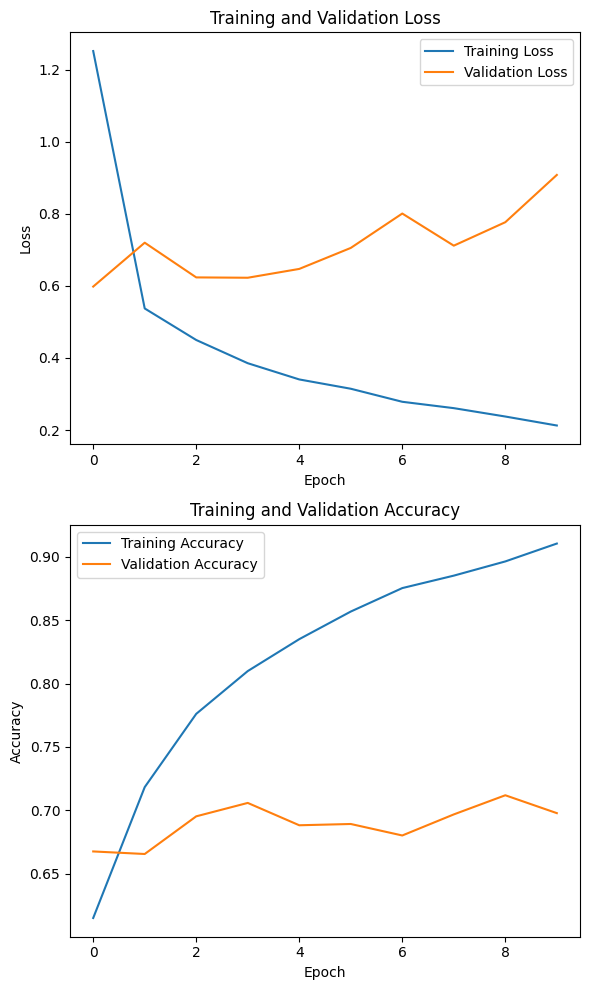

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

ax1.plot(history2.history['loss'], label='Training Loss')
ax1.plot(history2.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history2.history['accuracy'], label='Training Accuracy')
ax2.plot(history2.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
from keras.applications import VGG19
#vgg19
base_model1 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model3 = Sequential()
model3.add(base_model1)
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(2, activation='sigmoid'))
for layer in base_model1.layers:
    layer.trainable = False
model3.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history3=model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
249/249 [==============================] - 63s 205ms/step - loss: 1.0342 - accuracy: 0.6188 - val_loss: 0.5989 - val_accuracy: 0.6720
Epoch 2/10
249/249 [==============================] - 52s 207ms/step - loss: 0.5348 - accuracy: 0.7117 - val_loss: 0.5625 - val_accuracy: 0.7013
Epoch 3/10
249/249 [==============================] - 50s 203ms/step - loss: 0.4326 - accuracy: 0.7796 - val_loss: 0.5570 - val_accuracy: 0.7108
Epoch 4/10
249/249 [==============================] - 51s 204ms/step - loss: 0.3785 - accuracy: 0.8123 - val_loss: 0.5971 - val_accuracy: 0.7184
Epoch 5/10
249/249 [==============================] - 51s 203ms/step - loss: 0.3192 - accuracy: 0.8469 - val_loss: 0.6139 - val_accuracy: 0.7194
Epoch 6/10
249/249 [==============================] - 51s 204ms/step - loss: 0.2734 - accuracy: 0.8766 - val_loss: 0.6759 - val_accuracy: 0.7199
Epoch 7/10
249/249 [==============================] - 51s 204ms/step - loss: 0.2466 - accuracy: 0.8882 - val_loss: 0.7061 - val_ac

In [ ]:
model3.save('/content/drive/MyDrive/Saved Models/vgg19_IVY.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


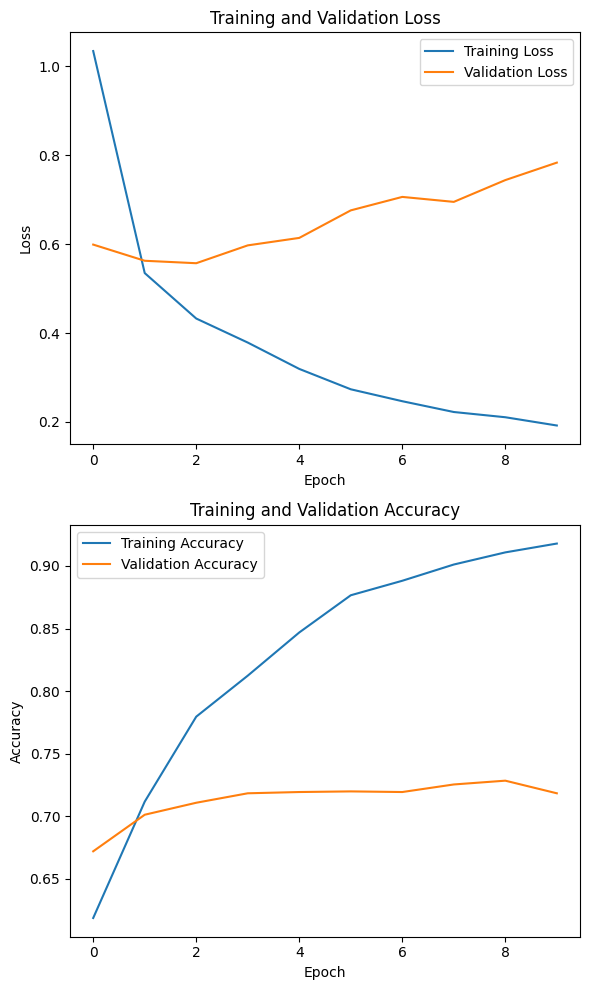

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

ax1.plot(history3.history['loss'], label='Training Loss')
ax1.plot(history3.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history3.history['accuracy'], label='Training Accuracy')
ax2.plot(history3.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend()

plt.tight_layout()
plt.show()

Saving 018.jpg to 018 (1).jpg


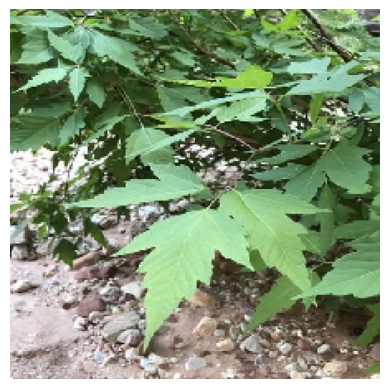

1/1 [==============================] - 0s 35ms/step
The image is classified as: nontoxic


In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from google.colab import files

def classify_images(model):
  uploaded= files.upload()
  file_name= list(uploaded.keys())[0]
  img= image.load_img(file_name, target_size=(224,224))
  img_array= image.img_to_array(img)
  img_array= np.expand_dims(img_array, axis=0)
  img_array= preprocess_input(img_array)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  predictions= resnet50.predict(img_array)
  predicted_class= "nontoxic" if predictions[0][1]<0.5 else "toxic"
  print(f"The image is classified as: {predicted_class}")
classify_images(resnet50)